## Import & merge datasets

In [2]:
import pandas as pd
import numpy as np

path = "C:\\Users\\tahalam\\Documents\\FACADE SAFETY PROJECTS\\datasets\\"
df = pd.read_csv(path+'Property BIN to Lat Lon.csv')
df1 = pd.read_csv(path+'facade outcome.csv')

In [3]:
df = df.rename(columns={'BIN': 'Bin'})
df['Bin']=df['Bin'].astype(str)
df1['Bin']= df1['Bin'].astype(str)
merge = pd.merge(df1,df,how='left',on=['Bin'])

In [4]:
merge.head()

,Bin,Address,Outcome,PredOutcome,PredProb,CITY OWNED,Active Shed,CB Number,OwnerProfile,QEWI NAME,Year Category,Stories Category,Build Area Category,Latitude,Longitude,House Number,Street Name,Borough Name
0,2017683,3424 GATES PLACE BRONX,1,0,2.375639e-01,0,0,207.0,ISIDOROS_SFIKAS,0,1916_1937,Low Rise,Low_Small,40.882462,-73.883743,3424,GATES PLACE,Bronx
1,3217054,4011 KINGS HIGHWAY BROOKLYN,1,1,9.990872e-01,0,0,318.0,LAV_BAUTA,KENNETH_SANTELLI,1938_1967,Low Rise,Medium_Low,40.624809,-73.935570,4001,KINGS HIGHWAY,Brooklyn
2,1087769,EAST 22 STREET MANHATTAN,0,0,2.970000e-08,0,1,105.0,TAMI_VEIKOS,RAYMOND_FRANK,2008_2019,High Rise,Medium_Low,40.740509,-73.988113,23,EAST 22 STREET,Manhattan
3,4052232,68-61 YELLOWSTONE BLVD QUEENS,0,0,4.228189e-02,0,0,406.0,JERRY_MARMAR,WILLIAM_STRUTH,1938_1967,Low Rise,Medium_Low,40.725010,-73.846687,68-61,YELLOWSTONE BOULEVARD,Queens
4,3129856,5201 15 AVENUE BROOKLYN,0,0,1.086910e-03,0,0,312.0,AARON_CUTTMAN,ANTHONY_STASIO,1938_1967,Low Rise,High_Small,40.630280,-73.989212,5201,15 AVENUE,Brooklyn


## Create point from Latitude & longitude 

In [5]:
import descartes
from shapely.geometry import Point, Polygon
import geopandas as gpd
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
geometry = [Point(xy) for xy in zip( merge["Longitude"],merge["Latitude"])]
geometry[:3]

In [7]:
crs = {'init':'epsg:4326'}
geo_df = gpd.GeoDataFrame(merge,
                          crs=crs,
                          geometry=geometry)
geo_df.head()

,Bin,Address,Outcome,PredOutcome,PredProb,CITY OWNED,Active Shed,CB Number,OwnerProfile,QEWI NAME,Year Category,Stories Category,Build Area Category,Latitude,Longitude,House Number,Street Name,Borough Name,geometry
0,2017683,3424 GATES PLACE BRONX,1,0,2.375639e-01,0,0,207.0,ISIDOROS_SFIKAS,0,1916_1937,Low Rise,Low_Small,40.882462,-73.883743,3424,GATES PLACE,Bronx,POINT (-73.88374329 40.88246155)
1,3217054,4011 KINGS HIGHWAY BROOKLYN,1,1,9.990872e-01,0,0,318.0,LAV_BAUTA,KENNETH_SANTELLI,1938_1967,Low Rise,Medium_Low,40.624809,-73.935570,4001,KINGS HIGHWAY,Brooklyn,POINT (-73.93556976000001 40.62480927)
2,1087769,EAST 22 STREET MANHATTAN,0,0,2.970000e-08,0,1,105.0,TAMI_VEIKOS,RAYMOND_FRANK,2008_2019,High Rise,Medium_Low,40.740509,-73.988113,23,EAST 22 STREET,Manhattan,POINT (-73.9881134 40.74050903)
3,4052232,68-61 YELLOWSTONE BLVD QUEENS,0,0,4.228189e-02,0,0,406.0,JERRY_MARMAR,WILLIAM_STRUTH,1938_1967,Low Rise,Medium_Low,40.725010,-73.846687,68-61,YELLOWSTONE BOULEVARD,Queens,POINT (-73.84668732 40.72500992)
4,3129856,5201 15 AVENUE BROOKLYN,0,0,1.086910e-03,0,0,312.0,AARON_CUTTMAN,ANTHONY_STASIO,1938_1967,Low Rise,High_Small,40.630280,-73.989212,5201,15 AVENUE,Brooklyn,POINT (-73.98921204 40.63027954)


In [8]:
gd = geo_df.sample(1000)

## Import Shapefile of NYC Community Districts 

In [9]:
pathb ="C:\\Users\\tahalam\\Documents\\FACADE SAFETY PROJECTS\\datasets\\Community Districts\\"
gis_df =gpd.read_file(pathb+"Community_Districts.shp")
gis_df.head()

,OBJECTID,shape_leng,boro_cd,Shape_Le_1,Shape_Area,geometry
0,1,51566.989012,311.0,51566.617412,1.031763e+08,"POLYGON ((991748.3937838823 161084.9551109821,..."
1,2,45440.919364,480.0,45440.918164,3.272360e+07,"POLYGON ((1022267.308139637 218659.5328749716,..."
2,3,49604.473413,202.0,49604.330421,6.186001e+07,"(POLYGON ((1012821.80570522 229228.2646902204,..."
3,4,82090.019764,306.0,82088.997142,8.549538e+07,"POLYGON ((983766.4720837176 191538.8981399834,..."
4,5,69466.685195,408.0,69466.584705,2.075710e+08,"POLYGON ((1051684.884146884 203955.166286394, ..."


In [12]:
##spatial join
cd  = gpd.sjoin(geo_df,gis_df,how = 'left', op = 'within')
cd = cd.dropna(axis=1, how='all')

C:\Users\tahalam\AppData\Local\Continuum\anaconda3\lib\site-packages\geopandas\tools\sjoin.py:56: UserWarning: CRS of frames being joined does not match!({'init': 'epsg:4326'} != {'proj': 'lcc', 'lat_1': 40.66666666666666, 'lat_2': 41.03333333333333, 'lat_0': 40.16666666666666, 'lon_0': -74, 'x_0': 300000, 'y_0': 0, 'ellps': 'GRS80', 'towgs84': '0,0,0,0,0,0,0', 'units': 'us-ft', 'no_defs': True})
  '(%s != %s)' % (left_df.crs, right_df.crs))


In [21]:
cd.head()

,Bin,Address,Outcome,PredOutcome,PredProb,CITY OWNED,Active Shed,CB Number,OwnerProfile,QEWI NAME,Year Category,Stories Category,Build Area Category,Latitude,Longitude,House Number,Street Name,Borough Name,geometry
0,2017683,3424 GATES PLACE BRONX,1,0,2.375639e-01,0,0,207.0,ISIDOROS_SFIKAS,0,1916_1937,Low Rise,Low_Small,40.882462,-73.883743,3424,GATES PLACE,Bronx,POINT (-73.88374329 40.88246155)
1,3217054,4011 KINGS HIGHWAY BROOKLYN,1,1,9.990872e-01,0,0,318.0,LAV_BAUTA,KENNETH_SANTELLI,1938_1967,Low Rise,Medium_Low,40.624809,-73.935570,4001,KINGS HIGHWAY,Brooklyn,POINT (-73.93556976000001 40.62480927)
2,1087769,EAST 22 STREET MANHATTAN,0,0,2.970000e-08,0,1,105.0,TAMI_VEIKOS,RAYMOND_FRANK,2008_2019,High Rise,Medium_Low,40.740509,-73.988113,23,EAST 22 STREET,Manhattan,POINT (-73.9881134 40.74050903)
3,4052232,68-61 YELLOWSTONE BLVD QUEENS,0,0,4.228189e-02,0,0,406.0,JERRY_MARMAR,WILLIAM_STRUTH,1938_1967,Low Rise,Medium_Low,40.725010,-73.846687,68-61,YELLOWSTONE BOULEVARD,Queens,POINT (-73.84668732 40.72500992)
4,3129856,5201 15 AVENUE BROOKLYN,0,0,1.086910e-03,0,0,312.0,AARON_CUTTMAN,ANTHONY_STASIO,1938_1967,Low Rise,High_Small,40.630280,-73.989212,5201,15 AVENUE,Brooklyn,POINT (-73.98921204 40.63027954)


## Count total predoutcome violation by each community districts

In [19]:
#cd_count = cd.groupby("CB Number").count()[["PredOutcome"]]
cd_count= cd[cd['PredOutcome']==1]['CB Number'].value_counts().to_frame('PredOutcome')
cd_count.index.name = 'CB Number'
cd_count = cd_count.sort_values(by = 'PredOutcome', ascending=False).reset_index()
cd_count.head()


,CB Number,PredOutcome
0,105.0,432
1,107.0,259
2,111.0,200
3,108.0,180
4,103.0,179


## Merge counted community districts with shapefile datastes.

In [15]:
gis_df = gis_df.rename(columns={'boro_cd': 'CB Number'})
gis_df['CB Number']= gis_df['CB Number'].astype(str)
cd_count['CB Number']= cd_count['CB Number'].astype(str)
geo_merge = gis_df.merge(cd_count, on='CB Number', how='left')

In [16]:
#geo_merge = geo_merge.sort_values(by = 'CB Number', ascending=True).reset_index()
geo_merge = geo_merge.dropna(subset = ['PredOutcome']).reset_index(drop =True)
geo_merge

,OBJECTID,shape_leng,CB Number,Shape_Le_1,Shape_Area,geometry,PredOutcome
0,1,51566.989012,311.0,51566.617412,1.031763e+08,"POLYGON ((991748.3937838823 161084.9551109821,...",18.0
1,3,49604.473413,202.0,49604.330421,6.186001e+07,"(POLYGON ((1012821.80570522 229228.2646902204,...",15.0
2,4,82090.019764,306.0,82088.997142,8.549538e+07,"POLYGON ((983766.4720837176 191538.8981399834,...",40.0
3,5,69466.685195,408.0,69466.584705,2.075710e+08,"POLYGON ((1051684.884146884 203955.166286394, ...",39.0
4,7,33489.439573,203.0,33489.439619,4.481446e+07,"POLYGON ((1017255.595722139 244431.386842981, ...",69.0
5,8,69086.588510,301.0,69086.591920,1.317643e+08,"POLYGON ((1005302.496596888 199455.7300753146,...",67.0
6,9,65933.851205,412.0,65933.751136,2.673335e+08,"POLYGON ((1039267.325976804 182097.8750273138,...",65.0
7,10,37027.877997,304.0,37027.837785,5.666822e+07,"POLYGON ((1012965.523265556 187886.9494071454,...",4.0
8,11,62062.516761,209.0,62061.981027,1.142552e+08,"POLYGON ((1028581.415918216 243756.4636521488,...",108.0
9,12,41785.544075,403.0,41785.336157,8.348672e+07,"POLYGON ((1022267.308139637 218659.5328749716,...",19.0


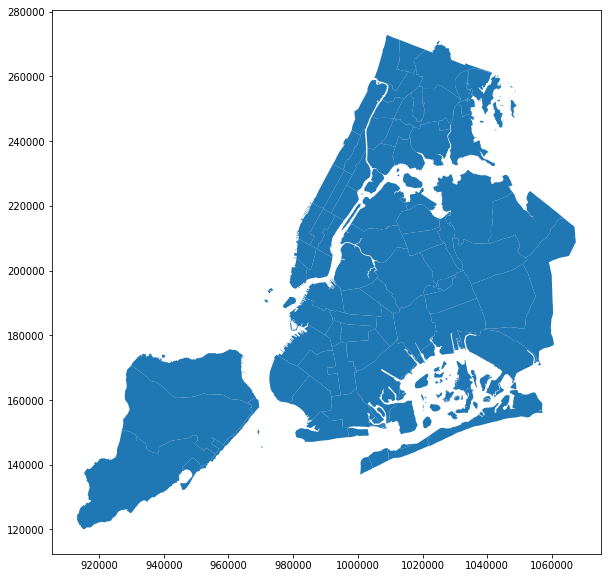

In [20]:
fig,ax = plt.subplots(figsize= (12,10))
gis_df.plot(ax=ax)

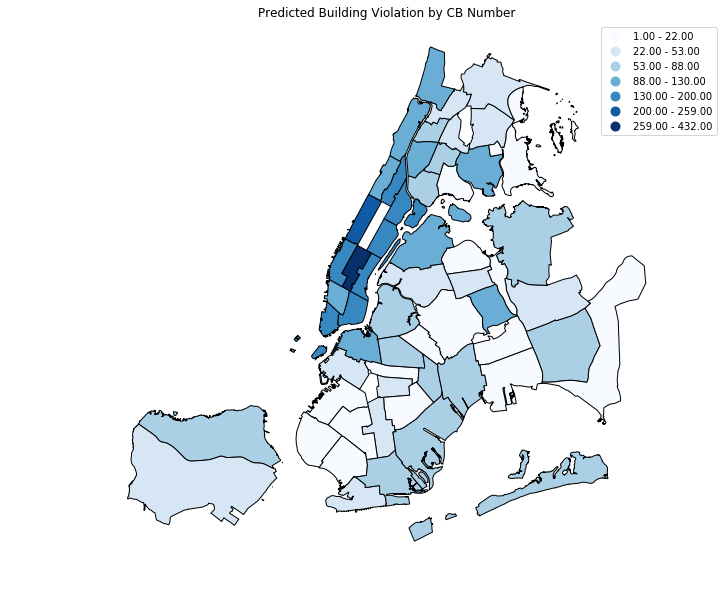

In [23]:
import mapclassify
f, ax = plt.subplots(1, figsize=(12, 10))
ax.set_title('Predicted Building Violation by CB Number')
geo_merge.plot(column='PredOutcome', scheme='fisher_jenks', k=7, 
                         cmap=plt.cm.Blues, edgecolor='black',legend=True, ax=ax)
ax.set_axis_off()
plt.axis('equal');